### SETUP INICIAL DO PROJETO

In [1]:
# Importação das bibliotecas necessárias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from google.cloud import bigquery
from google.oauth2 import service_account


# Carrega o .env: onde estão as credenciais do projeto/repositório
load_dotenv("/mnt/c/Users/wrpen/OneDrive/Desktop/df_lh/.env")

# Detectar ambiente: como eu estou usando wsl-ubuntu, no VS Code  -  Windows, estava dando conflitos de path
if os.name == "nt":  # se Windows
    credentials_path = r"C:\Temp\desafiolh-445818-3cb0f62cb9ef.json"
else:  # se WSL/Linux
    credentials_path = "/mnt/c/Temp/desafiolh-445818-3cb0f62cb9ef.json"

# Parâmetros injetados pelo Papermill ou definidos manualmente, caso não existam no ambiente
# Tables_to_process: lista de tabelas que serão processadas
# Output_dataset: nome do dataset onde os dados processados serão armazenados, neste caso, raw_data_cleaned
if 'tables_to_process' not in locals():
    tables_to_process = [
        "desafioadventureworks-446600.stg_marts_tables.fact_product_forecast"  ,
        "desafioadventureworks-446600.stg_marts_tables.fact_product_seasonality",
        "desafioadventureworks-446600.stg_marts_tables.dim_date", 
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail",
        "desafioadventureworks-446600.stg_staging_tables.stg_production_product",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_store",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesperson",
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_customer"
    ]

if 'output_dataset' not in locals():
    output_dataset = "desafioadventureworks-446600.stg_marts_tables"

# Configs do cliente BigQuery: input de project e location de acordo com dados no Bigquery
credentials = service_account.Credentials.from_service_account_file(credentials_path)
client = bigquery.Client(credentials=credentials, project=os.getenv("BIGQUERY_PROJECT"), location="us-central1")


In [2]:
# Print com a tabela que vai ser processada nesse notebook

print("Tabelas a processar:", tables_to_process)

Tabelas a processar: ['desafioadventureworks-446600.stg_marts_tables.fact_product_forecast', 'desafioadventureworks-446600.stg_marts_tables.fact_product_seasonality', 'desafioadventureworks-446600.stg_marts_tables.dim_date', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail', 'desafioadventureworks-446600.stg_staging_tables.stg_production_product', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_store', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_salesperson', 'desafioadventureworks-446600.stg_staging_tables.stg_sales_customer']


# Exploratory Data Analysis (EDA) e Data Cleaning

### Glossário dos dados:

O termo ''doc:'', situado no rodapé de algumas cells, indica algo como:

- documentação: documentar decisões, análises e resultados;

- abreviações de termos, como bkp, df, entre outros.

In [3]:
# Setup inicial do df 

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:.2f}'.format


#doc: df = dataframe  

In [4]:
# Dicionário para armazenar os df processados
df_processados = {}

# Iteração das tabelas e armazenamento em df
for input_table in tables_to_process:
    print(f"Processando tabela: {input_table}")
    
    table_name = input_table.split(".")[-1].replace("-", "_")  
    
    print("Lendo os dados do BigQuery...")
    query = f"SELECT * FROM `{input_table}`"
    table_data = client.query(query).to_dataframe()
    
    df_processados[table_name] = table_data
    print(f"Tabela {table_name} processada e armazenada com sucesso.")


print("Todas as tabelas foram processadas com sucesso!")

Processando tabela: desafioadventureworks-446600.stg_marts_tables.fact_product_forecast
Lendo os dados do BigQuery...
Tabela fact_product_forecast processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_marts_tables.fact_product_seasonality
Lendo os dados do BigQuery...
Tabela fact_product_seasonality processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_marts_tables.dim_date
Lendo os dados do BigQuery...
Tabela dim_date processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderheader
Lendo os dados do BigQuery...
Tabela stg_sales_salesorderheader processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_sales_salesorderdetail
Lendo os dados do BigQuery...
Tabela stg_sales_salesorderdetail processada e armazenada com sucesso.
Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_prod

In [5]:
# Listar colunas de cada tabela carregada
for table_name, df in df_processados.items():
    print(f"\nColunas na tabela {table_name}:")
    print(df.columns)


Colunas na tabela fact_product_forecast:
Index(['store_id', 'productid_id', 'forecast_date', 'forecast_quantity', 'avg_unit_price', 'forecast_sales_value'], dtype='object')

Colunas na tabela fact_product_seasonality:
Index(['productid_id', 'total_quantity_sold', 'year_month', 'year', 'month'], dtype='object')

Colunas na tabela dim_date:
Index(['orderdate_dt', 'year_nr', 'month_nr', 'quarter_nr', 'week_nr', 'day_nr', 'quarter_name', 'month_name', 'month_name_abr', 'first_day_of_month', 'last_day_of_month'], dtype='object')

Colunas na tabela stg_sales_salesorderheader:
Index(['salesorderid_id', 'revisionnumber_cd', 'orderdate_dt', 'duedate_dt', 'shipdate_dt', 'status_st', 'onlineorderflag_fl', 'accountnumber_cd', 'customerid_id', 'salespersonid_id', 'territoryid_id', 'billtoaddressid_id', 'shiptoaddressid_id', 'shipmethodid_id', 'creditcardid_id', 'creditcardapprovalcode_cd', 'subtotal_vr', 'taxamt_vr', 'freight_vr', 'totaldue_vr', 'rowguid_desc', 'modifieddate_dt'], dtype='object')


In [6]:
# Merge 1: Cliente + Loja
df_customer_store = pd.merge(
    df_processados['stg_sales_customer'],
    df_processados['stg_sales_store'],
    left_on='storeid_id',
    right_on='businessentityid_id',
    how='left',
    suffixes=('', '_store')
)

print(df_customer_store)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id                         store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store
0              11279         2996        <NA>               1  724BCFAD-E4E9-443B-8DC4-BAA0D9C7B645 2014-09-12 11:15:07.263000+00:00                 <NA>                              NaN              <NA>                                   NaN                              NaT
1              11302        13173        <NA>               1  64F830CC-A217-426B-A412-5897110AB74F 2014-09-12 11:15:07.263000+00:00                 <NA>                              NaN              <NA>                                   NaN                              NaT
2              11535         4974        <NA>               1  AAA897EA-4D6C-4169-AE51-7B90E6AB8DD1 2014-09-12 11:15:07.263000+00:00                 <NA>                   

In [7]:
# Merge 2: Cliente + Vendedor
df_customer_store_salesperson = pd.merge(
    df_customer_store,
    df_processados['stg_sales_salesperson'],
    left_on='salespersonid_id',
    right_on='businessentityid_id',
    how='left',
    suffixes=('', '_salesperson')
)

print(df_customer_store_salesperson)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id                         store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson
0              11279         2996        <NA>               1  724BCFAD-E4E9-443B-8DC4-BAA0D9C7B645 2014-09-12 11:15:07.263000+00:00                 <NA>                              NaN              <NA>                                   NaN                              NaT                             <NA>                        <NA>           <NA>      <NA>               NaN          NaN               NaN                                   NaN                         NaT
1              11302        13173        <NA> 

In [8]:
# Merge 3: Cliente + Pedido
df_customer_store_salesperson_order = pd.merge(
    df_customer_store_salesperson,
    df_processados['stg_sales_salesorderheader'],
    left_on='customerid_id',
    right_on='customerid_id',
    how='left',
    suffixes=('', '_order')
)
print(df_customer_store_salesperson_order)

       customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id                         store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  salespersonid_id_order  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order
0              11279         2996        <NA>               1  724BCFAD-E4E9-443B-8DC4-BAA0D9C7B645 20

In [9]:

# Merge 4: Pedido + Detalhes do Pedido
df_order_details = pd.merge(
    df_customer_store_salesperson_order,
    df_processados['stg_sales_salesorderdetail'],
    left_on='salesorderid_id',
    right_on='salesorderid_id',
    how='left',
    suffixes=('', '_details')
)
print(df_order_details)

        customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id                         store_nm  salespersonid_id                    rowguid_desc_store            modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr              rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  salespersonid_id_order  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order  salesorderdetailid_id carriertrackingnumber_cd  orderqty_qt  productid_id  specialofferid_id  unitpr

In [10]:

# Merge 5: Detalhes + Produto
df_final = pd.merge(
    df_order_details,
    df_processados['stg_production_product'],
    left_on='productid_id',
    right_on='productid_id',
    how='left',
    suffixes=('', '_product')
)

print(f"Dimensão do dataset final: {df_final.shape}")
print(df_final.head())

Dimensão do dataset final: (122018, 73)
   customerid_id  personid_id  storeid_id  territoryid_id                          rowguid_desc                  modifieddate_dt  businessentityid_id store_nm  salespersonid_id rowguid_desc_store modifieddate_dt_store  businessentityid_id_salesperson  territoryid_id_salesperson  salesquota_nr  bonus_vr  commissionpct_vr  salesytd_vr  saleslastyear_vr rowguid_desc_salesperson modifieddate_dt_salesperson  salesorderid_id  revisionnumber_cd              orderdate_dt                duedate_dt               shipdate_dt  status_st  onlineorderflag_fl accountnumber_cd  salespersonid_id_order  territoryid_id_order  billtoaddressid_id  shiptoaddressid_id  shipmethodid_id  creditcardid_id creditcardapprovalcode_cd  subtotal_vr  taxamt_vr  freight_vr  totaldue_vr                    rowguid_desc_order     modifieddate_dt_order  salesorderdetailid_id carriertrackingnumber_cd  orderqty_qt  productid_id  specialofferid_id  unitprice_vr  unitpricediscount_vr    

In [11]:
# Listar as colunas disponíveis no DataFrame
print(df.columns)

Index(['customerid_id', 'personid_id', 'storeid_id', 'territoryid_id', 'rowguid_desc', 'modifieddate_dt'], dtype='object')


In [12]:
# Seleção das colunas relevantes
selected_columns = [
    'orderqty_qt', 'productid_id', 'storeid_id', 
    'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id'
]
data_selected = df_final[selected_columns]


print(f"Dimensão do dataset após seleção de colunas: {data_selected.shape}")
print(data_selected.head())

Dimensão do dataset após seleção de colunas: (122018, 7)
   orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
0            1           873        <NA>          2.29          NaN             0.86               1
1            1           873        <NA>          2.29          NaN             0.86               1
2            1           930        <NA>         35.00          NaN            13.09               1
3            1           921        <NA>          4.99          NaN             1.87               1
4            1           930        <NA>         35.00          NaN            13.09               1


In [13]:
# valores ausentes
missing_values = data_selected.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
orderqty_qt          701
productid_id         701
storeid_id         60398
listprice_vr         701
salesytd_vr        60398
standardcost_vr      701
territoryid_id         0
dtype: int64


In [14]:
# colunas relevantes
selected_columns = [
    'orderqty_qt', 'productid_id', 'storeid_id', 
    'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id'
]
data_selected = df_final[selected_columns]

print(data_selected)

        orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
0                 1           873        <NA>          2.29          NaN             0.86               1
1                 1           873        <NA>          2.29          NaN             0.86               1
2                 1           930        <NA>         35.00          NaN            13.09               1
3                 1           921        <NA>          4.99          NaN             1.87               1
4                 1           930        <NA>         35.00          NaN            13.09               1
...             ...           ...         ...           ...          ...              ...             ...
122013         <NA>          <NA>        1272           NaN   4116871.23              NaN              10
122014         <NA>          <NA>         856           NaN   4116871.23              NaN              10
122015         <NA>          <NA>        1484 

In [15]:
# preencher valores ausentes numéricos com a mediana
columns_to_fill = ['orderqty_qt', 'listprice_vr', 'salesytd_vr', 'standardcost_vr']
for col in columns_to_fill:
    median_value = data_selected[col].median()
    data_selected[col] = data_selected[col].fillna(median_value)

C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\2530634158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].fillna(median_value)
C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\2530634158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[col] = data_selected[col].fillna(median_value)
C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\2530634158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [16]:
# Preencher valores ausentes categóricos com 'Desconhecido' ou equivalente
data_selected['storeid_id'] = data_selected['storeid_id'].fillna(0)

C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\3894906654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['storeid_id'] = data_selected['storeid_id'].fillna(0)


In [17]:
# valores ausentes após limpeza
print("Valores ausentes por coluna após a limpeza:")
print(data_selected.isnull().sum())

Valores ausentes por coluna após a limpeza:
orderqty_qt          0
productid_id       701
storeid_id           0
listprice_vr         0
salesytd_vr          0
standardcost_vr      0
territoryid_id       0
dtype: int64


In [18]:
# valores únicos na coluna
unique_values = data_selected['productid_id'].value_counts()
print("Valores únicos em 'productid_id':")
print(unique_values)

# proporção de valores ausentes
total_rows = data_selected.shape[0]
missing_productid = data_selected['productid_id'].isnull().sum()
missing_percentage = (missing_productid / total_rows) * 100
print(f"\nPercentual de valores ausentes: {missing_percentage:.2f}%")

# relação com outras colunas
print("\nResumo estatístico dos dados quando 'productid_id' está ausente:")
print(data_selected[data_selected['productid_id'].isnull()].describe())

print("\nResumo estatístico dos dados quando 'productid_id' não está ausente:")
print(data_selected[data_selected['productid_id'].notnull()].describe())


Valores únicos em 'productid_id':
productid_id
870    4688
712    3382
873    3354
921    3095
711    3090
       ... 
927       9
943       6
911       6
942       5
897       2
Name: count, Length: 266, dtype: Int64

Percentual de valores ausentes: 0.57%

Resumo estatístico dos dados quando 'productid_id' está ausente:
       orderqty_qt  productid_id  storeid_id  listprice_vr  salesytd_vr  standardcost_vr  territoryid_id
count       701.00          0.00      701.00        701.00       701.00           701.00          701.00
mean          1.00          <NA>     1035.88         63.50   2651861.45            38.49            4.83
std           0.00          <NA>      477.74          0.00    908084.70             0.00            2.57
min           1.00          <NA>      292.00         63.50   1352577.13            38.49            1.00
25%           1.00          <NA>      642.00         63.50   1827066.71            38.49            3.00
50%           1.00          <NA>      992.00   

In [19]:
#doc:

# Análise dos Resultados
# Valores únicos em productid_id: existem 266 produtos únicos, com alguns produtos dominando a distribuição (id = 870 com 4688 ocorrências), indicando que os dados têm boa diversidade, 
# mas alguns produtos aparecem significativamente mais vezes.

# % de valores ausentes: apenas 0,57% dos valores estão ausentes na coluna, o que é insignificante em relação ao tamanho total do dataset (122.018 linhas).
# Esse baixo percentual sugere que podemos optar por ignorar essas linhas sem perder muita informação.

# Resumo dos dados quando productid_id está ausente: todas as linhas com productid_id ausente têm valores fixos em listprice_vr (63.50) e standardcost_vr (38.49), 
# indicando que essas linhas podem ser menos informativas. Essas linhas estão concentradas em poucas lojas (storeid_id varia entre 292 e 2051) e 
# territórios (territoryid_id varia de 1 a 10). Orderqty_qt é constante com valor 1, o que pode limitar a utilidade dessas linhas para análise de demanda.

# Resumo dos dados quando productid_id não está ausente: dados mais ricos e variados, com maior dispersão em métricas como orderqty_qt, listprice_vr, e 
# standardcost_vr. Estes dados possuem mais valor analítico, especialmente para um modelo de previsão.

# Decisão
# Dado o baixo percentual de valores ausentes e a limitada utilidade das linhas onde productid_id está ausente, optei em remover essas linhas para 
# simplificar o modelo e focar em dados mais completos e ricos.

In [20]:
# Remover linhas onde 'productid_id' está ausente
data_cleaned = data_selected.dropna(subset=['productid_id'])

print(f"Dimensão do dataset após remoção de valores ausentes em 'productid_id': {data_cleaned.shape}")
print("Valores ausentes por coluna após a limpeza:")
print(data_cleaned.isnull().sum())

Dimensão do dataset após remoção de valores ausentes em 'productid_id': (121317, 7)
Valores ausentes por coluna após a limpeza:
orderqty_qt        0
productid_id       0
storeid_id         0
listprice_vr       0
salesytd_vr        0
standardcost_vr    0
territoryid_id     0
dtype: int64


In [21]:
# Renomear o dataset
regression_dataset = data_cleaned

print(f"Dimensão do regression_dataset: {regression_dataset.shape}")
print("Valores ausentes por coluna no regression_dataset:")
print(regression_dataset.isnull().sum())


Dimensão do regression_dataset: (121317, 7)
Valores ausentes por coluna no regression_dataset:
orderqty_qt        0
productid_id       0
storeid_id         0
listprice_vr       0
salesytd_vr        0
standardcost_vr    0
territoryid_id     0
dtype: int64


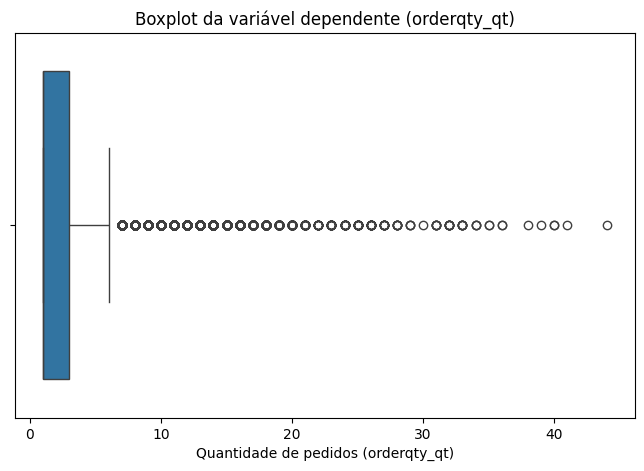

In [22]:
# Boxplot para identificar outliers em 'orderqty_qt'
plt.figure(figsize=(8, 5))
sns.boxplot(x=regression_dataset['orderqty_qt'])
plt.title('Boxplot da variável dependente (orderqty_qt)')
plt.xlabel('Quantidade de pedidos (orderqty_qt)')
plt.show()


In [23]:
# O gráfico boxplot mostra que a variável 'orderqty_qt' possui vários valores considerados como outliers, valores estes que estão muito acima da maioria dos dados, 
# indicando pedidos com quantidades significativamente maiores.

# Isso é muito comum quando se trata de banco de dados de vendas, onde existem pedidos excepcionais de grandes quantidades. Porém, esses outliers podem 
# impactar negativamente na performance do modelo de regressão.

In [24]:
# Para tratar os outliers; calcular os limites usando o IQR (Intervalo Interquartil)*

# IQR
Q1 = regression_dataset['orderqty_qt'].quantile(0.25)
Q3 = regression_dataset['orderqty_qt'].quantile(0.75)
IQR = Q3 - Q1

# limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# filtrar os dados dentro dos limites
regression_dataset_no_outliers = regression_dataset[
    (regression_dataset['orderqty_qt'] >= lower_limit) & 
    (regression_dataset['orderqty_qt'] <= upper_limit)
]


print(f"Dimensão do dataset após remoção de outliers: {regression_dataset_no_outliers.shape}")


#doc*: valores fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] serão considerados outliers e removidos


Dimensão do dataset após remoção de outliers: (114390, 7)


# resposta questão 10

In [25]:
# Carrega o .env: onde estão as credenciais do projeto/repositório
load_dotenv("/mnt/c/Users/wrpen/OneDrive/Desktop/df_lh/.env")

# Detectar ambiente: como eu estou usando wsl-ubuntu, no VS Code  -  Windows, estava dando conflitos de path
if os.name == "nt":  # se Windows
    credentials_path = r"C:\Temp\desafiolh-445818-3cb0f62cb9ef.json"
else:  # se WSL/Linux
    credentials_path = "/mnt/c/Temp/desafiolh-445818-3cb0f62cb9ef.json"

# Parâmetros injetados pelo Papermill ou definidos manualmente, caso não existam no ambiente
# Tables_to_process: lista de tabelas que serão processadas
# Output_dataset: nome do dataset onde os dados processados serão armazenados, neste caso, raw_data_cleaned
if 'tables_to_process' not in locals():
    tables_to_process = [
        "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory"
    ]

if 'output_dataset' not in locals():
    output_dataset = "desafioadventureworks-446600.stg_marts_tables"

# Configs do cliente BigQuery: input de project e location de acordo com dados no Bigquery
credentials = service_account.Credentials.from_service_account_file(credentials_path)
client = bigquery.Client(credentials=credentials, project=os.getenv("BIGQUERY_PROJECT"), location="us-central1")


In [26]:
# Nome da tabela desejada
desired_table = "desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory"

# Nome ajustado para armazenamento no dicionário
table_name = desired_table.split(".")[-1].replace("-", "_")

print(f"Processando tabela: {desired_table}")
query = f"SELECT * FROM `{desired_table}`"
stg_sales_salesterritory = client.query(query).to_dataframe()

print(f"Tabela {table_name} carregada com sucesso.")

Processando tabela: desafioadventureworks-446600.stg_staging_tables.stg_sales_salesterritory
Tabela stg_sales_salesterritory carregada com sucesso.


In [27]:
print(stg_sales_salesterritory.head(20))

# Listar as colunas da tabela carregada
print("\nColunas na tabela:")
print(stg_sales_salesterritory.columns)

   territoryid_id    territory_nm countryregioncode_cd territory_group_tp  salesytd_vr  saleslastyear_vr                          rowguid_desc           modifieddate_dt
0               9       AUSTRALIA                   AU              group         5.98              2.28  602E612E-DFE9-41D9-B894-27E489747885 2008-04-30 00:00:00+00:00
1               6          CANADA                   CA              group         6.77              5.69  06B4AF8A-1639-476E-9266-110461D66B00 2008-04-30 00:00:00+00:00
2               8         GERMANY                   DE              group         3.81              1.31  6D2450DB-8159-414F-A917-E73EE91C38A9 2008-04-30 00:00:00+00:00
3               7          FRANCE                   FR              group         4.77              2.40  BF806804-9B4C-4B07-9D19-706F2E689552 2008-04-30 00:00:00+00:00
4              10  UNITED KINGDOM                   GB              group         5.01              1.64  05FC7E1F-2DEA-414E-9ECD-09D150516FB5 2008-04-30 0

In [28]:
#  territórios dos EUA e do mundo
us_territories = [1, 2, 3, 4, 5]  # territórios representando regiões nos EUA
world_territories = [6, 7, 8, 9, 10]  # territórios representando países no resto do mundo

# Separar os dados em dois grupos
us_data = regression_dataset[regression_dataset['territoryid_id'].isin(us_territories)]
world_data = regression_dataset[regression_dataset['territoryid_id'].isin(world_territories)]

print(f"Dimensão dos dados - EUA: {us_data.shape}")
print(f"Dimensão dos dados - Mundo: {world_data.shape}")


Dimensão dos dados - EUA: (60153, 7)
Dimensão dos dados - Mundo: (61164, 7)


In [29]:
from sklearn.linear_model import LinearRegression

# Definir as features e o target
feature_columns = ['productid_id', 'storeid_id', 'listprice_vr', 'salesytd_vr', 'standardcost_vr', 'territoryid_id']
X = regression_dataset[feature_columns]
y = regression_dataset['orderqty_qt']

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

print("Modelo treinado com sucesso.")


Modelo treinado com sucesso.


In [30]:
# soma da demanda prevista por grupo

# Prever a demanda nos dados dos EUA e do mundo
us_data['predicted_demand'] = model.predict(us_data[feature_columns])
world_data['predicted_demand'] = model.predict(world_data[feature_columns])

# Somar a demanda prevista em cada grupo
us_total_demand = us_data['predicted_demand'].sum()
world_total_demand = world_data['predicted_demand'].sum()

print(f"Demanda prevista total - EUA: {us_total_demand}")
print(f"Demanda prevista total - Mundo: {world_total_demand}")

# Determinar qual grupo apresentou maior crescimento
if us_total_demand > world_total_demand:
    print("O grupo 'EUA (Províncias)' apresentou maior crescimento de demanda.")
else:
    print("O grupo 'Resto do Mundo (Países)' apresentou maior crescimento de demanda.")


Demanda prevista total - EUA: 155145.6227442541
Demanda prevista total - Mundo: 119768.37725574596
O grupo 'EUA (Províncias)' apresentou maior crescimento de demanda.


C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\2140904183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['predicted_demand'] = model.predict(us_data[feature_columns])
C:\Users\wrpen\AppData\Local\Temp\ipykernel_73368\2140904183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_data['predicted_demand'] = model.predict(world_data[feature_columns])


In [31]:
# Conclusão:
# Após realizar a previsão da demanda para os próximos três meses, foi identificado que o grupo 'EUA (Províncias)' apresentou maior crescimento de demanda
# em comparação ao grupo 'Resto do Mundo (Países)'.

# qual grupo apresentou maior crescimento?
if us_total_demand > world_total_demand:
    print("As províncias dos EUA apresentaram maior crescimento em demanda.")
else:
    print("Os países no resto do mundo apresentaram maior crescimento em demanda.")
     
# Métricas finais:
# - Demanda prevista total - EUA: 155,145.63
# - Demanda prevista total - Mundo: 119,768.37

# Isso sugere que o crescimento da demanda é mais significativo nas províncias dos EUA, possivelmente devido a fatores como maior densidade de 
# consumidores, distribuição mais eficiente ou estratégias comerciais mais eficazes.


As províncias dos EUA apresentaram maior crescimento em demanda.
